6. Реализовать алгоритм Беллмана-Форда для произвольного графа

=====================================================

In [15]:
def BellFord(edges, num_vertices, src=0):
    """
    Реализация алгоритма Беллмана-Форда.
        param edges: Список ребер в формате (u, v, weight)
        param num_vertices: Количество вершин в графе (V)
        param src: Начальная вершина
        return: Массив кратчайших расстояний или [-1], если есть отрицательный цикл
    """
    
    inf = float("inf")
    dist = [inf] * num_vertices
    dist[src] = 0

    # Основной цикл выполняется V раз.
    # V-1 раз - для поиска путей (достаточно для любого графа без отр. циклов).
    # V-й раз (последняя итерация) - исключительно для проверки отр. циклов.
    for i in range(num_vertices):
        
        changed = False
        
        for u, v, wt in edges:
            # Стандартная релаксация
            if dist[u] != inf and dist[u] + wt < dist[v]:
                
                # Если мы все еще можем улучшить путь на V-й итерации,
                # значит, мы бегаем по кругу и уменьшаем вес -> Отрицательный цикл.
                # Индекс i идет от 0 до V-1. Значит, проверка i == V - 1 верна.
                if i == num_vertices - 1:
                    return [-1]
                
                dist[v] = dist[u] + wt
                changed = True
        
        # Если за целый проход по всем ребрам мы ничего не улучшили,
        # значит, кратчайшие пути уже найдены. Нет смысла крутить цикл дальше.
        if not changed:
            break
            
    return dist


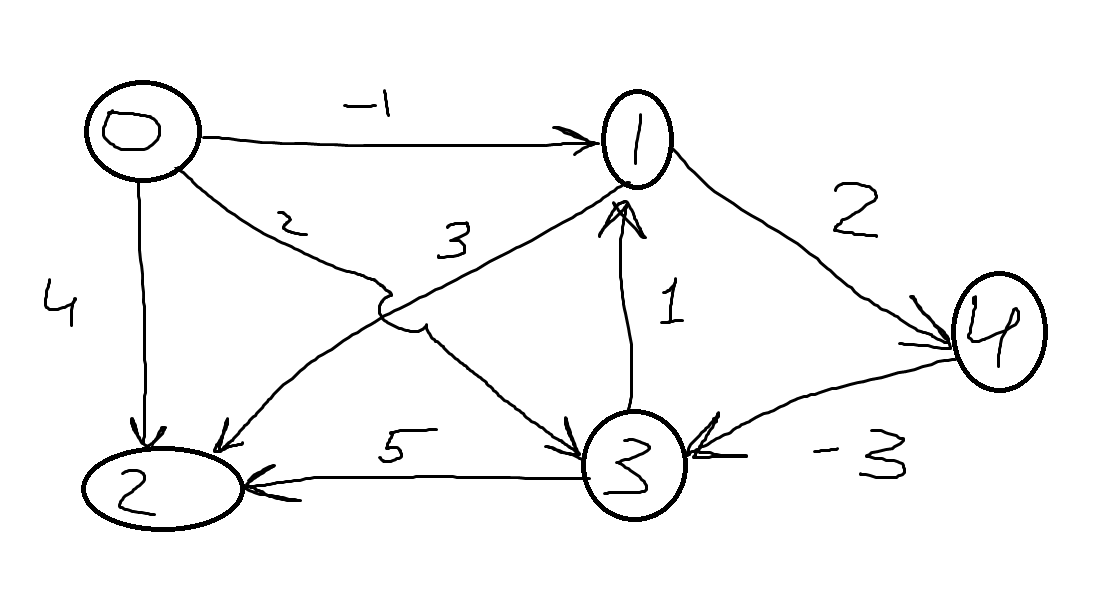

In [16]:
V_count = 5
edges_list = [
    (0, 1, -1),
    (0, 2, 4),
    (1, 2, 3),
    (1, 3, 2),
    (1, 4, 2),
    (3, 2, 5),
    (3, 1, 1),
    (4, 3, -3)
]

result = BellFord(edges_list, V_count, 0)
print(f"Кратчайшие расстояния от вершины 0: {result}")

Кратчайшие расстояния от вершины 0: [0, -1, 2, -2, 1]


Теоретическая оценка алгоритма:

$V$ - число вершин, $E$ - число ребер

* Время (Time Complexity): $O(V \cdot E)$
  * В худшем случае мы проходим по всем ребрам $V$ раз
  

* Память (Space Complexity): $O(V)$
  * Мы храним только массив расстояний размером $V$